<a href="https://colab.research.google.com/github/ljm9748/deepstudy/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf

In [3]:
!pip install -q tensorflow-gpu

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 60.0MB/s 
     |████████████████████████████████| 3.9MB 48.2MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.


In [30]:
print('version : ', tf.__version__)
print('gpu available : ', tf.test.is_gpu_available())

version :  2.2.0-rc2
gpu available :  True


In [0]:
from  keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys

In [0]:
seed=0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [0]:
(X_train, Y_class_train), (X_test, Y_class_test)=mnist.load_data()

In [34]:
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


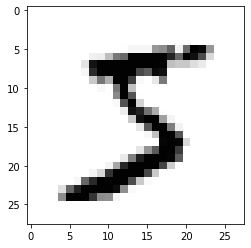

In [35]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [36]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%d\t" %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [0]:
X_train= X_train.reshape(X_train.shape[0], 784)
X_train=X_train.astype('float64')
X_train=X_train/255

In [0]:
X_test=X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [39]:
print(Y_class_train[0])

5


In [0]:
 Y_train=np_utils.to_categorical(Y_class_train, 10)
 Y_test=np_utils.to_categorical(Y_class_test, 10)

In [41]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
import os

In [0]:
model=Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
MODEL_DIR='/content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)


In [0]:
modelpath='/content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week/model/{epoch:02d}-{val_loss:4f}.hdf5'

In [0]:
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=10)

In [49]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.14736, saving model to /content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week/model/01-0.147357.hdf5

Epoch 00002: val_loss improved from 0.14736 to 0.10182, saving model to /content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week/model/02-0.101818.hdf5

Epoch 00003: val_loss improved from 0.10182 to 0.08934, saving model to /content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week/model/03-0.089345.hdf5

Epoch 00004: val_loss improved from 0.08934 to 0.07773, saving model to /content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week/model/04-0.077735.hdf5

Epoch 00005: val_loss improved from 0.07773 to 0.07450, saving model to /content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week/model/05-0.074504.hdf5

Epoch 00006: val_loss improved from 0.07450 to 0.06646, saving model to /content/gdrive/My Drive/Colab Notebooks/deepstudy/assignment/3rd week/model/06-0.066463.hdf5

E

In [50]:
print(model.evaluate(X_test, Y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9831
0.9830999970436096


In [0]:
import matplotlib.pyplot as plt

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

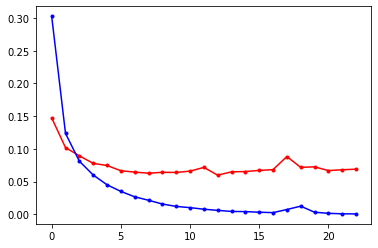

In [52]:
x_len=numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

No handles with labels found to put in legend.


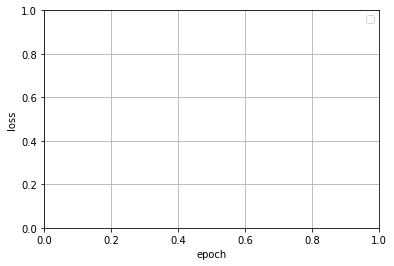

In [53]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [55]:
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

ValueError: ignored

In [56]:
model.add(Conv2D(64, (3, 3), activation='relu'))

ValueError: ignored

In [57]:
model.add(MaxPooling2D(pool_size=2))

ValueError: ignored

In [0]:
model.add(Dropout(0.25))
model.add(Flatten())